#### Prepare

In [ ]:
# Import packages
library("microbiome")
library("phyloseq")
library("ggplot2")
library("magrittr")
library("dplyr")
library("reshape2")
library("DESeq2")
library("knitr")
source(system.file("extdata/check_anova.R", package = "microbiome"))

In [2]:
# Import data
data(dietswap) 
# Only check the core taxa to speed up examples
pseq <- core(dietswap, detection = 50, prevalence = 80/100)

head(otu_table(pseq))
head(sample_data(pseq))
head(tax_table(pseq))

,Sample-1,Sample-2,Sample-3,Sample-4,Sample-5,Sample-6,Sample-7,Sample-8,Sample-9,Sample-10,⋯,Sample-213,Sample-214,Sample-215,Sample-216,Sample-217,Sample-218,Sample-219,Sample-220,Sample-221,Sample-222
Bacteroides vulgatus et rel.,2774,48,455,469,167,75,33,85,13,35,⋯,220,178,69,266,95,97,3470,166,226,488
Butyrivibrio crossotus et rel.,219,251,278,146,177,271,92,292,58,431,⋯,382,97,216,438,348,77,376,140,167,355
Clostridium cellulosi et rel.,91,917,495,310,728,281,2528,992,491,1899,⋯,185,191,288,485,953,729,267,283,180,580
Clostridium orbiscindens et rel.,85,750,510,691,265,229,671,243,447,149,⋯,261,233,342,277,270,403,111,207,414,1339
Clostridium symbiosum et rel.,220,247,214,111,155,274,211,226,153,168,⋯,225,143,100,75,428,99,78,135,121,354
Faecalibacterium prausnitzii et rel.,321,766,1466,365,1385,1319,387,1056,414,343,⋯,846,856,1317,1144,1751,295,1681,1506,914,2765


,subject,sex,nationality,group,sample,timepoint,timepoint.within.group,bmi_group
,<fct>,<fct>,<fct>,<fct>,<chr>,<int>,<int>,<fct>
Sample-1,byn,male,AAM,DI,Sample-1,4,1,obese
Sample-2,nms,male,AFR,HE,Sample-2,2,1,lean
Sample-3,olt,male,AFR,HE,Sample-3,2,1,overweight
Sample-4,pku,female,AFR,HE,Sample-4,2,1,obese
Sample-5,qjy,female,AFR,HE,Sample-5,2,1,overweight
Sample-6,riv,female,AFR,HE,Sample-6,2,1,obese


,Phylum,Family,Genus
Bacteroides vulgatus et rel.,Bacteroidetes,Bacteroidetes,Bacteroides vulgatus et rel.
Butyrivibrio crossotus et rel.,Firmicutes,Clostridium cluster XIVa,Butyrivibrio crossotus et rel.
Clostridium cellulosi et rel.,Firmicutes,Clostridium cluster IV,Clostridium cellulosi et rel.
Clostridium orbiscindens et rel.,Firmicutes,Clostridium cluster IV,Clostridium orbiscindens et rel.
Clostridium symbiosum et rel.,Firmicutes,Clostridium cluster XIVa,Clostridium symbiosum et rel.
Faecalibacterium prausnitzii et rel.,Firmicutes,Clostridium cluster IV,Faecalibacterium prausnitzii et rel.


#### DESeq2 analysis

In [3]:
ds2 <- phyloseq_to_deseq2(pseq, ~ nationality)
dds <- DESeq(ds2)
res <- results(dds)
df <- as.data.frame(res)
df$taxon <- rownames(df)
df <- df %>% arrange(log2FoldChange, padj)

print(head(kable((df))))

converting counts to integer mode

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

-- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x + b, and a local regression fit was automatically substituted.
   specify fitType='local' or 'mean' to avoid this message next time.

final dispersion estimates

fitting model and testing

-- replacing outliers and refitting for 1 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

estimating dispersions

fitting model and testing



[1] "|  baseMean| log2FoldChange|     lfcSE|       stat|    pvalue|      padj|taxon                                |"
[2] "|---------:|--------------:|---------:|----------:|---------:|---------:|:------------------------------------|"
[3] "| 1433.9869|     -3.1720779| 0.2058346| -15.410809| 0.0000000| 0.0000000|Bacteroides vulgatus et rel.         |"
[4] "|  203.1597|     -0.6287847| 0.1318531|  -4.768828| 0.0000019| 0.0000051|Subdoligranulum variable at rel.     |"
[5] "|  186.4217|     -0.4881398| 0.1519530|  -3.212440| 0.0013161| 0.0018097|Butyrivibrio crossotus et rel.       |"
[6] "|  236.2309|     -0.4867323| 0.1304717|  -3.730559| 0.0001911| 0.0003002|Clostridium symbiosum et rel.        |"


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Phylum,Family,Genus
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<fct>
Bacteroides vulgatus et rel.,1433.9869,-3.1720779,0.2058346,-15.410809,1.384669e-53,1.523136e-52,Bacteroidetes,Bacteroidetes,Bacteroides vulgatus et rel.
Butyrivibrio crossotus et rel.,186.4217,-0.4881398,0.1519530,-3.212440,1.316127e-03,1.809675e-03,Firmicutes,Clostridium cluster XIVa,Butyrivibrio crossotus et rel.
Clostridium orbiscindens et rel.,226.4437,0.7498031,0.1254362,5.977566,2.264966e-09,8.304875e-09,Firmicutes,Clostridium cluster IV,Clostridium orbiscindens et rel.
Clostridium symbiosum et rel.,236.2309,-0.4867323,0.1304717,-3.730559,1.910555e-04,3.002300e-04,Firmicutes,Clostridium cluster XIVa,Clostridium symbiosum et rel.
Oscillospira guillermondii et rel.,1519.4096,1.0328714,0.1529439,6.753271,1.445486e-11,7.950171e-11,Firmicutes,Clostridium cluster IV,Oscillospira guillermondii et rel.
Prevotella melaninogenica et rel.,5387.4184,1.2686673,0.3115977,4.071491,4.671307e-05,1.027688e-04,Bacteroidetes,Bacteroidetes,Prevotella melaninogenica et rel.


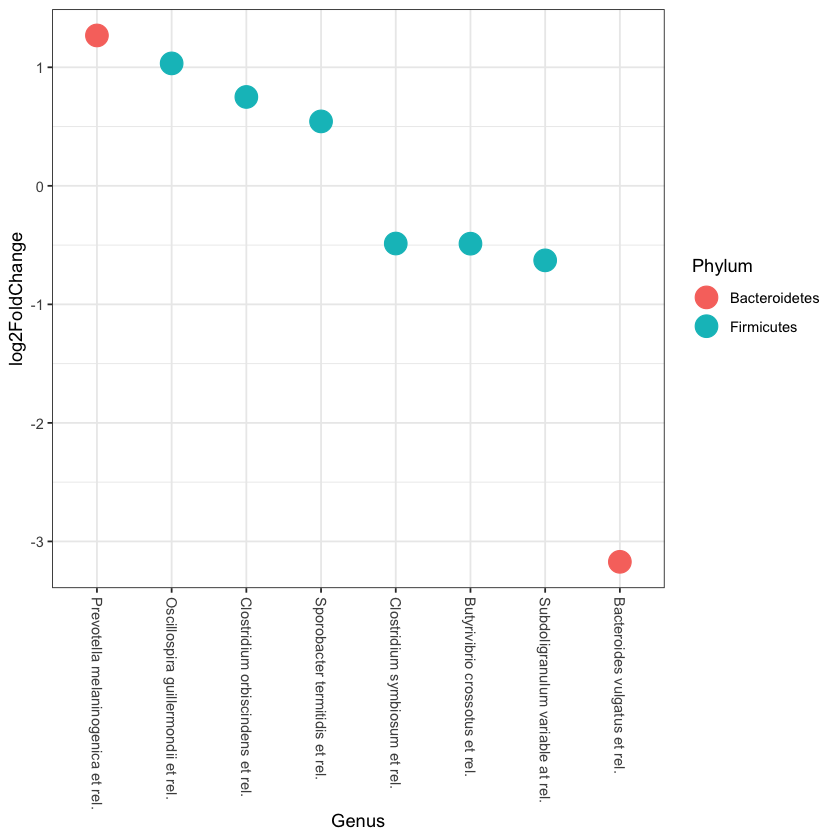

In [9]:
# Plot
ds2 <- phyloseq_to_deseq2(pseq, ~ nationality)
dds <- DESeq(ds2)
res <- results(dds, cooksCutoff = FALSE)
alpha <- 0.01
sigtab <- res[which(res$padj < alpha), ]
sigtab <- cbind(as(sigtab, "data.frame"), as(tax_table(pseq)[rownames(sigtab), ], "matrix"))
head(sigtab)
theme_set(theme_bw())
scale_fill_discrete <- function(palname = "Set1", ...) {
    scale_fill_brewer(palette = palname, ...)
}

# Phylum order
x <- tapply(sigtab$log2FoldChange, sigtab$Phylum, function(x) max(x))
x <- sort(x, TRUE)
sigtab$Phylum = factor(as.character(sigtab$Phylum), levels = names(x))
# Genus order
x <- tapply(sigtab$log2FoldChange, sigtab$Genus, function(x) max(x))
x <- sort(x, TRUE)
sigtab$Genus = factor(as.character(sigtab$Genus), levels = names(x))
ggplot(sigtab, aes(x = Genus, y = log2FoldChange, color = Phylum)) + geom_point(size = 6) + 
  theme(axis.text.x = element_text(angle = -90, hjust = 0, vjust = 0.5))     

#### Validating DESeq2 results

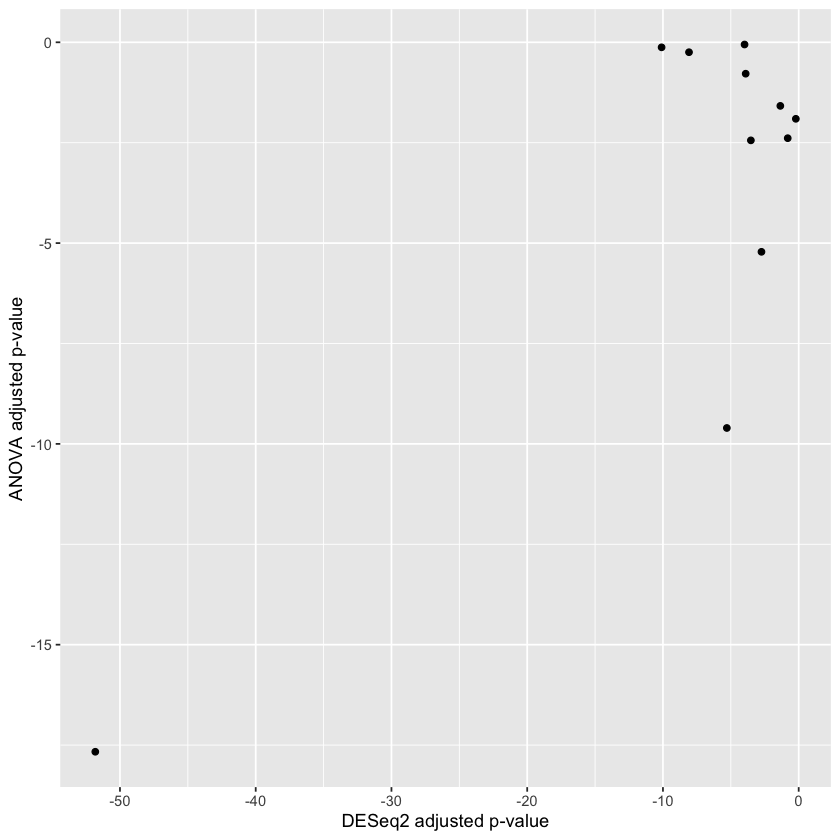

In [5]:
# Identify top taxa based on standard ANOVA
ano <- check_anova(pseq, "nationality");
ano$log2FC <- log2(ano$ave.AFR) - log2(ano$ave.AAM)
taxa.anova <- as.character(subset(ano, padj < 0.01 & abs(log2FC) > log2(2))$taxa)

# lowPick the top taxa based on DESEq2
taxa.deseq <- subset(res, padj < 0.01 & abs(log2FoldChange) > log2(2))$taxon

# Also the est p-values are well correlated (higher not so)
mf <- data.frame(df$padj, ano$padj)
p <- ggplot(mf, aes(x = log10(df$padj), y = log10(ano$padj))) +
       labs(x = 'DESeq2 adjusted p-value', y = 'ANOVA adjusted p-value') +
       geom_point()
print(p)